In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
#url = 'Resources/fma_3secs.csv'
orignial_df = pd.read_csv(Path('Resources/fma_3secs.csv'))
orignial_df

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,3585.029860,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2-000574.mp3,0.436518,0.074070,0.263343,0.001272,1969.829480,75422.537033,2031.262553,55656.387528,3668.926532,...,34.857918,-7.328859,30.140669,0.171362,23.946671,-5.767624,31.231506,3.249825,28.855471,Rock
2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,5738.018893,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,6252.910907,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,5554.903846,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,703.804462,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,775.692233,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,887.664889,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,730.638146,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [3]:
orignial_df_subset = orignial_df[(orignial_df.label == 'Instrumental') | (orignial_df.label == 'International')]
orignial_df_subset

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
100,1-000708.mp3,0.531248,0.074645,0.292974,0.007625,2090.083849,499211.456531,2518.433555,206750.973624,4827.578501,...,37.072041,-3.047591,32.607235,-2.242013,51.260616,-4.198438,75.536995,2.555559,49.571270,International
101,2-000708.mp3,0.504365,0.077693,0.276038,0.008052,2250.326545,474260.743443,2521.281054,168108.461035,5067.673715,...,22.968208,-2.548331,38.868893,-1.830567,49.659405,-4.832151,77.530060,3.521929,45.061771,International
102,3-000708.mp3,0.424711,0.099192,0.283082,0.004592,2657.213514,354671.590784,2841.673253,72332.435090,6111.951247,...,36.375851,-4.426717,56.786915,-0.022147,49.147640,-7.561225,40.356735,2.190212,40.491592,International
103,4-000708.mp3,0.416914,0.098893,0.276488,0.004804,2050.188107,208289.909581,2553.629972,121066.419007,4877.850248,...,44.181408,-0.751172,37.319473,-2.165192,26.467796,-5.714239,64.381660,3.331830,56.441319,International
104,5-000708.mp3,0.428968,0.096262,0.273277,0.005582,2198.062732,359462.361407,2621.388032,159997.931100,5238.200120,...,66.485931,-1.664813,36.328548,-2.933496,41.377449,-6.765586,52.765003,3.944376,53.365833,International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79765,6-152254.mp3,0.391574,0.092223,0.245938,0.002598,1509.448831,98213.194949,1835.237750,53747.465591,2851.658654,...,66.476509,4.466017,32.845093,5.784225,36.219242,-1.927512,58.793030,3.664120,46.179516,International
79766,7-152254.mp3,0.370129,0.090035,0.257844,0.001642,1381.418402,97541.949133,1701.184967,47206.514882,2532.884428,...,39.611095,4.948144,34.175186,6.857648,50.176090,-3.958933,68.288986,-2.217236,36.823318,International
79767,8-152254.mp3,0.384251,0.085958,0.248628,0.002116,1293.950713,121065.606163,1678.633299,48123.363580,2425.715332,...,68.149567,7.390368,32.448124,12.013916,77.113861,4.936217,158.965652,13.917130,112.696655,International
79768,9-152254.mp3,0.376661,0.081209,0.248196,0.002556,1450.355344,103839.617072,1754.262994,28256.352948,2818.282189,...,74.433868,0.074678,85.973778,6.824223,34.491524,4.018934,57.492096,12.945966,43.012989,International


In [4]:
#drop label and filename columns
X = orignial_df_subset.drop(['label','filename'], axis=1)
# get label values 
y = orignial_df_subset['label']
y.unique()

array(['International', 'Instrumental'], dtype=object)

### Code with VAR features

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


rf_model = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

### Code without Var features - scaled data

In [5]:
X = X[X.columns.drop(list(X.filter(regex='var')))]
X

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc1_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
100,0.531248,0.292974,2090.083849,2518.433555,4827.578501,0.093799,-0.000038,-0.000559,129.199219,-56.998993,...,0.404335,9.482736,1.577892,7.697780,-0.020824,2.994560,-3.047591,-2.242013,-4.198438,2.555559
101,0.504365,0.276038,2250.326545,2521.281054,5067.673715,0.104304,-0.000080,0.000008,129.199219,-41.455273,...,-3.833241,7.788484,-0.179002,4.323314,-2.003319,3.706306,-2.548331,-1.830567,-4.832151,3.521929
102,0.424711,0.283082,2657.213514,2841.673253,6111.951247,0.085284,0.000095,-0.000525,123.046875,-49.124386,...,-5.092156,6.028035,1.390081,2.135429,-4.834723,3.247042,-4.426717,-0.022147,-7.561225,2.190212
103,0.416914,0.276488,2050.188107,2553.629972,4877.850248,0.070726,0.000089,-0.000411,129.199219,-67.317352,...,-5.693818,7.780324,-2.244363,1.710539,-3.142427,2.765442,-0.751172,-2.165192,-5.714239,3.331830
104,0.428968,0.273277,2198.062732,2621.388032,5238.200120,0.078238,-0.000097,-0.000436,172.265625,-61.087959,...,-6.203454,6.508696,-1.389135,3.778795,-3.324232,0.322612,-1.664813,-2.933496,-6.765586,3.944376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79765,0.391574,0.245938,1509.448831,1835.237750,2851.658654,0.052982,0.000270,-0.000204,143.554688,-89.110535,...,-3.023266,1.727669,-1.870252,5.379509,2.990116,4.158150,4.466017,5.784225,-1.927512,3.664120
79766,0.370129,0.257844,1381.418402,1701.184967,2532.884428,0.055303,0.000208,-0.000428,143.554688,-97.402550,...,4.397996,10.791409,8.073030,12.412457,9.832041,8.548679,4.948144,6.857648,-3.958933,-2.217236
79767,0.384251,0.248628,1293.950713,1678.633299,2425.715332,0.044678,-0.000149,-0.000097,143.554688,-118.243614,...,4.265545,6.439664,-0.957491,2.686646,2.540619,5.960658,7.390368,12.013916,4.936217,13.917130
79768,0.376661,0.248196,1450.355344,1754.262994,2818.282189,0.052178,-0.000011,-0.000783,143.554688,-97.801865,...,4.171188,8.319480,4.442944,16.874008,12.075556,10.380192,0.074678,6.824223,4.018934,12.945966


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:

rf_model = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.889


In [12]:
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
57967,Instrumental,Instrumental
62544,Instrumental,Instrumental
35030,International,Instrumental
52986,Instrumental,Instrumental
61485,International,Instrumental
...,...,...
79514,Instrumental,International
51466,Instrumental,Instrumental
36735,International,International
10477,International,International


In [13]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 Instrumental       0.91      0.86      0.89      2496
International       0.87      0.91      0.89      2504

     accuracy                           0.89      5000
    macro avg       0.89      0.89      0.89      5000
 weighted avg       0.89      0.89      0.89      5000



### Removing low importance features

[0.02648279 0.02939165 0.11935607 0.0874306  0.11056886 0.05060392
 0.02855464 0.03047    0.01772704 0.03980042 0.08082454 0.02880695
 0.02871152 0.02304447 0.02342491 0.02346016 0.0227794  0.02333925
 0.02318228 0.01883398 0.0181414  0.01888307 0.02260303 0.01889993
 0.01704174 0.01673319 0.01684331 0.0161635  0.01789738]


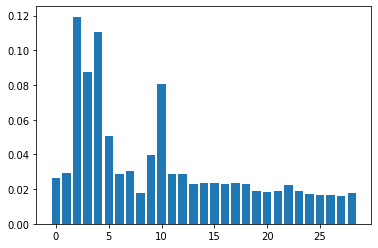

In [14]:
#shows features that contirbutes the most
features = rf_model.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [15]:
#select form features that contributes the most
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf_model)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False, False,  True,  True,  True,  True, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [16]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [17]:
lr_model_sel = LogisticRegression()
lr_model_sel.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_model_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_model_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7689333333333334
Testing Score: 0.77


In [18]:
rf_model_sel = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_model_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_model_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9917333333333334
Testing Score: 0.8032
